In [40]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt

In [41]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/2024-05-22/11-10-41_172"
ukb_emb_file = f"{model_path}/ukb_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_embeddings/full_embeddings.csv"
schiz_label_file = "/neurospin/dico/data/deep_folding/current/datasets/schiz/aymeric_stratification/with_sub/used_schiz_subjects.csv"

In [42]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,5.432290,-84.892740,33.315792,-7.049661,-7.507852,10.846748,13.542539,47.007800,-6.275629,-12.157645,...,18.618883,-22.328201,-11.619389,9.310632,-16.091793,41.408813,-21.855005,-16.961920,1.880005,0.473854
sub-1000458,-17.880394,-29.299046,-14.614202,29.987500,-3.727156,-45.344795,-14.721815,-28.593801,12.441346,-41.392600,...,23.718998,-41.303024,17.594896,21.326073,19.596663,51.967190,-46.527443,-49.815400,-4.782093,-23.219810
sub-1000575,-21.813969,-5.924204,-0.732563,40.099840,-43.304140,-8.424111,23.330912,-44.398037,35.032210,-1.645326,...,30.667528,-14.564964,42.112720,14.092869,-17.137610,0.742716,2.365352,-15.306153,-41.426900,-52.546085
sub-1000606,-1.777638,-16.572740,-0.746122,33.847355,34.642160,-20.888044,-11.285620,16.506075,-46.124268,-23.970570,...,18.211540,-54.622500,-5.647837,30.119522,-42.929333,27.837877,-21.744110,-11.798349,-32.511406,28.247044
sub-1000963,18.920776,7.814844,2.285441,17.640108,77.785645,1.500585,-13.611822,12.163332,23.932123,-20.821978,...,13.283907,7.090580,3.042791,21.108675,-5.854667,-2.318940,-16.277578,9.575321,-50.938457,25.417662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,7.814580,114.039276,-12.543190,-18.287552,13.220377,-9.992147,1.641776,9.179816,-8.243899,37.518910,...,-96.977850,54.612694,-49.267944,-62.060290,1.740461,-16.166983,35.490337,41.690037,15.280187,29.421053
sub-6023808,46.609882,-11.583793,11.648086,-2.732068,-50.201797,22.318478,8.752677,8.847806,32.827766,-30.574791,...,-5.904632,38.071285,-3.896197,13.106461,-0.093022,9.442344,7.406930,-17.868698,18.993950,-40.505413
sub-6023847,-14.551548,82.701130,-40.821236,21.247412,15.809932,-50.270310,-37.040420,-41.943783,-6.205572,21.036257,...,-25.124798,-14.711883,17.607431,-35.937057,37.286842,-8.029363,-24.754467,-0.331382,-14.300363,-0.003852


In [43]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-32.097730,-26.112066,5.017861,13.723637,1.500321,-16.806799,-2.648568,25.912054,-28.183125,-9.871546,...,28.079382,-9.047775,-2.646877,29.068773,-33.670500,29.059720,-70.328110,-29.525402,-9.072391,11.142021
sub-10189_ses-1,9.202733,-67.293076,9.508164,-1.054758,36.549793,15.089321,-13.478678,30.153378,15.747787,25.854897,...,11.734486,-27.846958,-41.857000,5.639940,-1.795358,37.961422,-20.307579,-41.747086,-0.877465,31.098114
sub-10193_ses-1,15.454280,27.349480,30.469622,44.461147,37.779125,43.773860,37.286240,7.763149,35.811230,-34.569660,...,22.019772,47.003963,-30.428732,25.969456,-19.704807,-17.853886,25.388271,-62.067490,-24.331457,-13.673612
sub-10206_ses-1,-10.501004,-56.050247,35.582558,-17.490173,50.019882,48.094063,2.771705,64.397680,4.413475,9.605237,...,20.307680,-1.427102,-69.491610,24.159386,-34.190845,54.560455,-6.343101,-23.787067,-15.565082,45.756080
sub-10217_ses-1,52.700060,68.158550,10.814352,4.699611,20.729515,0.617438,12.618069,-4.073796,-0.114612,-29.722230,...,-20.951689,17.012974,18.511835,-5.402861,33.862316,-7.081302,12.350121,-17.677534,9.723365,-12.457599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,26.476284,37.966090,-35.031840,42.238430,5.099427,21.677269,-5.347708,-27.821547,115.458390,24.166245,...,-9.310410,50.757282,10.746838,5.437753,61.472230,-21.716726,49.118378,-15.863717,-22.792791,-22.396862
sub-va110289_ses-v1,-20.210726,85.974200,-24.511760,-1.699144,2.863399,27.990265,-1.191663,-35.829517,42.866096,82.758380,...,-46.835995,17.869220,11.188208,-60.017930,-2.278120,-57.343900,25.112923,39.551970,-8.066958,23.980873
sub-ye110322_ses-v1,2.450920,8.754570,10.963875,38.707830,45.424282,48.858543,-3.627100,25.961964,47.905266,-9.492921,...,28.694300,41.803280,-53.503180,18.142714,-13.122017,-8.507538,11.091854,-91.011314,-36.800890,1.219929


In [44]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29.0,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43.0,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30.0,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18.0,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25.0,control,BSNIP,Dallas
...,...,...,...,...,...
sub-ESOC10060_ses-v1,F,26.0,control,PRAGUE,PRAGUE
sub-ESOC10019_ses-v1,F,28.0,control,PRAGUE,PRAGUE
sub-ESOC10063_ses-v1,M,31.0,control,PRAGUE,PRAGUE


In [45]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [46]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [47]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,0.007220,-0.112836,0.044282,-0.009370,-0.009979,0.014417,0.018000,0.062481,-0.008341,-0.016159,...,0.024747,-0.029678,-0.015444,0.012375,-0.021388,0.055039,-0.029049,-0.022545,0.002499,0.000630
sub-1000458,-0.022660,-0.037131,-0.018521,0.038004,-0.004724,-0.057466,-0.018657,-0.036238,0.015767,-0.052458,...,0.030060,-0.052344,0.022298,0.027027,0.024835,0.065859,-0.058965,-0.063132,-0.006060,-0.029427
sub-1000575,-0.029826,-0.008100,-0.001002,0.054829,-0.059210,-0.011518,0.031900,-0.060705,0.047900,-0.002250,...,0.041932,-0.019915,0.057581,0.019269,-0.023432,0.001016,0.003234,-0.020928,-0.056643,-0.071846
sub-1000606,-0.002315,-0.021579,-0.000972,0.044072,0.045107,-0.027198,-0.014695,0.021492,-0.060058,-0.031212,...,0.023713,-0.071123,-0.007354,0.039218,-0.055898,0.036247,-0.028313,-0.015362,-0.042333,0.036780
sub-1000963,0.026948,0.011130,0.003255,0.025124,0.110788,0.002137,-0.019387,0.017324,0.034086,-0.029656,...,0.018920,0.010099,0.004334,0.030065,-0.008339,-0.003303,-0.023184,0.013638,-0.072550,0.036202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.009471,0.138217,-0.015202,-0.022165,0.016023,-0.012111,0.001990,0.011126,-0.009992,0.045473,...,-0.117538,0.066191,-0.059713,-0.075218,0.002109,-0.019595,0.043015,0.050529,0.018520,0.035659
sub-6023808,0.063400,-0.015757,0.015844,-0.003716,-0.068286,0.030358,0.011906,0.012035,0.044654,-0.041589,...,-0.008032,0.051786,-0.005300,0.017828,-0.000127,0.012844,0.010075,-0.024306,0.025836,-0.055097
sub-6023847,-0.019032,0.108167,-0.053391,0.027790,0.020678,-0.065750,-0.048446,-0.054860,-0.008116,0.027514,...,-0.032862,-0.019242,0.023029,-0.047003,0.048769,-0.010502,-0.032377,-0.000433,-0.018704,-0.000005


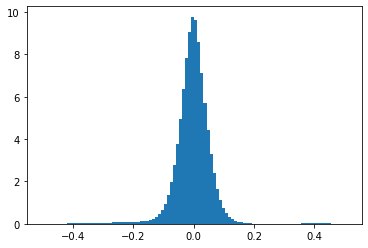

In [48]:
p = plt.hist(ukb_emb.values.ravel(), bins=100, density=True)

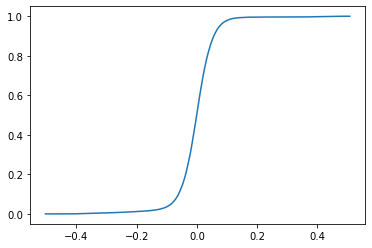

In [49]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [50]:
X2[int(N*0.59)]

0.00840145595014694

In [51]:
len(ukb_emb)

21051

In [52]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [53]:
ukb_positive

dim215    1.000000
dim216    0.950786
dim139    0.949646
dim207    0.908270
dim65     0.899197
            ...   
dim204    0.002185
dim209    0.000095
dim83     0.000000
dim179    0.000000
dim156    0.000000
Length: 256, dtype: float64

In [54]:
ukb_positive[10:50]

dim26     0.787944
dim107    0.768420
dim60     0.744668
dim25     0.742530
dim238    0.741817
dim28     0.731604
dim236    0.729847
dim132    0.726996
dim152    0.720773
dim117    0.719681
dim195    0.712983
dim9      0.709087
dim13     0.707710
dim68     0.706142
dim112    0.698494
dim200    0.684766
dim21     0.683578
dim137    0.680728
dim82     0.675835
dim199    0.673365
dim167    0.672890
dim102    0.672225
dim212    0.671370
dim198    0.670894
dim127    0.670467
dim79     0.665859
dim130    0.663246
dim31     0.662581
dim56     0.660681
dim90     0.656358
dim168    0.655361
dim16     0.653081
dim95     0.651656
dim118    0.649755
dim86     0.647760
dim252    0.646240
dim136    0.637784
dim202    0.628711
dim172    0.625291
dim27     0.624958
dtype: float64

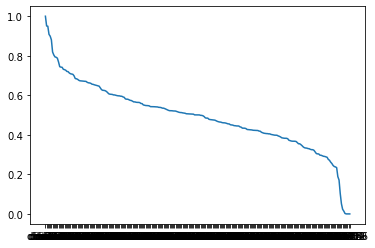

In [55]:
plt.plot(ukb_positive)

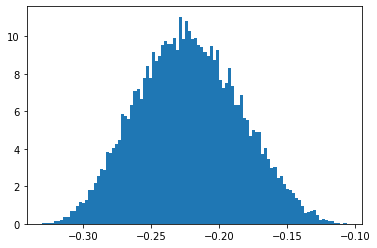

In [56]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

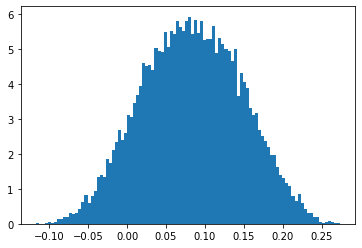

In [57]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

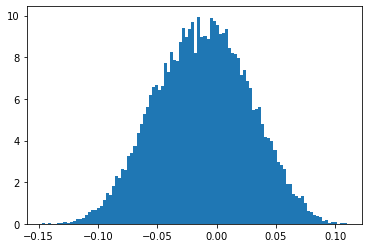

In [58]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

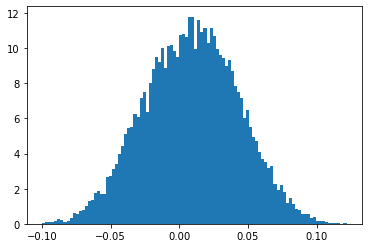

In [59]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [60]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [61]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [62]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

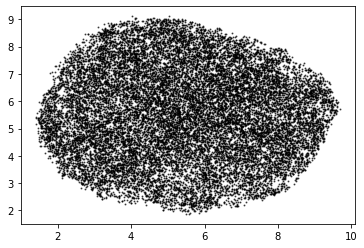

In [63]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [64]:
visual_schiz_emb = reducer.transform(schiz_emb)

In [65]:
visual_schiz_emb.shape

(1292, 2)

In [72]:
col = ['black' if x['diagnosis'] in "control" else "red" for _, x in schiz_label[["diagnosis"]].iterrows()]

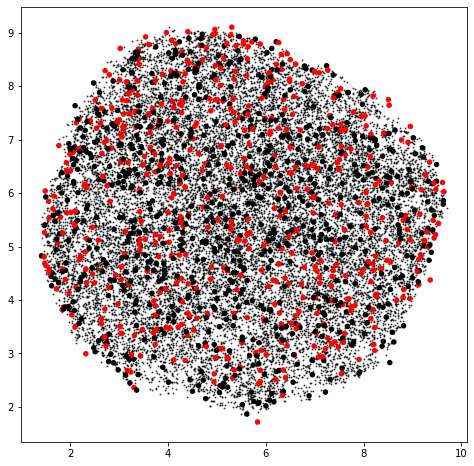

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c=col, s=20, alpha=1)

In [68]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [69]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,-0.041518,-0.033776,0.006491,0.017751,0.001941,-0.021739,-0.003426,0.033517,-0.036455,-0.012769,...,0.036320,-0.011703,-0.003424,0.037600,-0.043552,0.037588,-0.090969,-0.038191,-0.011735,0.014412
sub-10189_ses-1,0.012093,-0.088427,0.012494,-0.001386,0.048029,0.019828,-0.017712,0.039623,0.020694,0.033975,...,0.015420,-0.036593,-0.055003,0.007411,-0.002359,0.049884,-0.026685,-0.054858,-0.001153,0.040865
sub-10193_ses-1,0.021495,0.038040,0.042380,0.061841,0.052547,0.060885,0.051862,0.010798,0.049810,-0.048083,...,0.030627,0.065378,-0.042323,0.036121,-0.027407,-0.024833,0.035313,-0.086330,-0.033843,-0.019019
sub-10206_ses-1,-0.013013,-0.069456,0.044093,-0.021673,0.061983,0.059597,0.003435,0.079800,0.005469,0.011903,...,0.025165,-0.001768,-0.086112,0.029938,-0.042368,0.067610,-0.007860,-0.029476,-0.019288,0.056700
sub-10217_ses-1,0.076426,0.098844,0.015683,0.006815,0.030062,0.000895,0.018299,-0.005908,-0.000166,-0.043104,...,-0.030384,0.024672,0.026846,-0.007835,0.049108,-0.010269,0.017910,-0.025636,0.014101,-0.018066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,-0.023933,0.101806,-0.029026,-0.002012,0.003391,0.033145,-0.001411,-0.042428,0.050760,0.097998,...,-0.055461,0.021160,0.013249,-0.071070,-0.002698,-0.067904,0.029737,0.046835,-0.009552,0.028397
sub-ye110322_ses-v1,0.003280,0.011716,0.014673,0.051803,0.060792,0.065388,-0.004854,0.034745,0.064112,-0.012705,...,0.038402,0.055946,-0.071604,0.024281,-0.017561,-0.011386,0.014844,-0.121802,-0.049251,0.001633
sub-yh100442_ses-v1,-0.059418,-0.081767,0.043332,0.035031,-0.047545,0.090187,-0.002895,0.036218,0.026197,0.003211,...,0.088124,-0.045738,-0.002349,0.048738,-0.067326,0.001761,0.031976,-0.020865,0.010037,-0.007917


In [70]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [71]:
schiz_order

,dim215,dim216,dim139,dim207,dim65,dim243,dim240,dim75,dim47,dim17,...,dim24,dim145,dim181,dim98,dim165,dim204,dim209,dim83,dim179,dim156
ID,,,,,,,,,,,,,,,,,,,,,
sub-10171_ses-1,0.367475,0.077427,0.078091,0.001183,0.025050,0.105036,0.059464,0.066408,0.085601,0.063658,...,-0.148017,-0.047301,-0.004287,-0.090803,-0.079763,-0.242146,-0.091872,-0.247020,-0.292520,-0.343519
sub-10189_ses-1,0.422583,0.110878,0.092725,0.018357,0.015402,0.063584,0.124004,0.077437,-0.010838,0.011281,...,-0.007348,-0.022712,-0.030602,0.015594,-0.157800,-0.201512,-0.147440,-0.262999,-0.229753,-0.382963
sub-10193_ses-1,0.375686,0.034822,0.043108,0.026148,0.108641,0.024302,0.178904,0.128675,0.056459,-0.036926,...,-0.065469,-0.036792,-0.062992,-0.153311,-0.066899,-0.187125,-0.085921,-0.264650,-0.327158,-0.429870
sub-10206_ses-1,0.351808,0.080103,0.194607,-0.000695,0.116799,0.100941,0.073952,0.126055,-0.021130,-0.005600,...,0.027859,0.049894,-0.037192,0.005809,-0.031439,-0.119013,-0.124492,-0.264160,-0.258386,-0.385004
sub-10217_ses-1,0.427321,0.028038,0.012276,0.005212,0.082482,-0.024523,0.139682,0.038336,0.084795,-0.043323,...,-0.081050,-0.098571,-0.117229,-0.224451,-0.117314,-0.208400,-0.122136,-0.241550,-0.321032,-0.412948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.378477,0.067769,0.085491,-0.005709,0.198771,0.094992,-0.002407,-0.000522,0.043423,0.032860,...,-0.003656,-0.029284,-0.149842,-0.142447,-0.093162,-0.026465,-0.115407,-0.214373,-0.259960,-0.342779
sub-ye110322_ses-v1,0.390458,0.064432,0.081268,0.020586,0.097180,0.064500,0.170173,0.151332,0.048064,-0.005724,...,-0.093076,0.002034,-0.045383,-0.074522,-0.083524,-0.222419,-0.109349,-0.290520,-0.288850,-0.407770
sub-yh100442_ses-v1,0.366718,0.012114,0.160623,0.004564,0.141182,0.121768,0.051632,0.117947,0.088719,0.063819,...,-0.041914,-0.039288,-0.089869,-0.073101,-0.012448,-0.128843,-0.135182,-0.189510,-0.298106,-0.386914
